In [1]:
import numpy as np

from keras.datasets import fashion_mnist as mnist

from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Activation, Dropout
from keras.utils import to_categorical

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Using TensorFlow backend.
/Users/tentenich/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train =  x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [5]:
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total para

In [7]:
model.fit(x_train, y_train, 
          batch_size=64, epochs=10,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 30s 497us/step - loss: 0.5059 - acc: 0.8168 - val_loss: 0.4142 - val_acc: 0.8459
Epoch 2/10
60000/60000 [==============================] - 34s 572us/step - loss: 0.3842 - acc: 0.8591 - val_loss: 0.3665 - val_acc: 0.8690
Epoch 3/10
60000/60000 [==============================] - 34s 560us/step - loss: 0.3557 - acc: 0.8694 - val_loss: 0.3626 - val_acc: 0.8683
Epoch 4/10
60000/60000 [==============================] - 32s 531us/step - loss: 0.3331 - acc: 0.8778 - val_loss: 0.3378 - val_acc: 0.8781
Epoch 5/10
60000/60000 [==============================] - 34s 572us/step - loss: 0.3139 - acc: 0.8848 - val_loss: 0.3345 - val_acc: 0.8797
Epoch 6/10
60000/60000 [==============================] - 30s 496us/step - loss: 0.3051 - acc: 0.8875 - val_loss: 0.3653 - val_acc: 0.8656
Epoch 7/10
60000/60000 [==============================] - 27s 442us/step - loss: 0.2953 - acc: 0.8887 - val_loss: 0.

In [8]:
model.evaluate(x_test, y_test, verbose=0)

[0.31469209027290346, 0.8891]

In [9]:
tmp_model = Model(model.inputs, model.layers[-2].output)

In [10]:
def softmax(x, t=1.0):
    x_exp = np.exp(x / t)
    return x_exp / x_exp.sum(axis=1, keepdims=True)

In [11]:
result = {}
for t in tqdm_notebook([1, 4, 16, 32, 128]):
    probs_train = softmax(tmp_model.predict(x_train), t=10)
    for k in tqdm_notebook(range(2, 8), leave=False):
        new_model = Sequential()
        new_model.add(Flatten(input_shape=(28, 28)))
        new_model.add(Dense(512 // 2 ** k, activation='relu'))
        new_model.add(Dropout(0.2))
        new_model.add(Dense(256 // 2 ** k, activation='relu'))
        new_model.add(Dropout(0.2))
        new_model.add(Dense(10))
        new_model.add(Activation('softmax'))

        new_model.compile('adam', 'kullback_leibler_divergence', metrics=['accuracy'])

        new_model.fit(x_train, probs_train, 
                      batch_size=64, epochs=10,
                      validation_data=(x_test, y_test), verbose=0)
        
        result[(t, k)] = new_model.evaluate(x_test, y_test, verbose=0)
        print(result[(t, k)])

HBox(children=(IntProgress(value=0, max=5), HTML(value='')))

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

[1.1610413181304933, 0.85899999999999999]
[1.2026985507011414, 0.84399999999999997]
[1.225564053440094, 0.80449999999999999]
[1.409953079032898, 0.62670000000000003]
[1.6020756855010987, 0.54600000000000004]
[1.7919849548339843, 0.37640000000000001]


HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

[1.1620588979721069, 0.86140000000000005]
[1.2019466753005981, 0.84760000000000002]
[1.2285985300064086, 0.81259999999999999]
[1.3737139690399169, 0.68489999999999995]
[1.6457752994537354, 0.51700000000000002]
[1.8284554531097412, 0.30309999999999998]


HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

[1.1579137153625487, 0.86280000000000001]
[1.171803758239746, 0.84960000000000002]
[1.2938455959320068, 0.75339999999999996]
[1.4242952377319336, 0.63549999999999995]
[1.569299104309082, 0.53220000000000001]
[1.7743207567214965, 0.37819999999999998]


HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

[1.1729410400390625, 0.85919999999999996]
[1.2028791221618653, 0.84550000000000003]
[1.2536537002563477, 0.82010000000000005]
[1.3802650272369386, 0.69710000000000005]
[1.5988061145782471, 0.50739999999999996]
[1.8331725666046144, 0.33950000000000002]


HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

[1.1962925031661988, 0.86270000000000002]
[1.1786498293876648, 0.84570000000000001]
[1.2713024853706361, 0.77790000000000004]
[1.3661492040634156, 0.67469999999999997]
[1.643050743484497, 0.55220000000000002]
[1.8758137201309204, 0.35759999999999997]



In [12]:
result_baseline = {}

for k in tqdm_notebook(range(2, 8), leave=False):
    new_model = Sequential()
    new_model.add(Flatten(input_shape=(28, 28)))
    new_model.add(Dense(512 // 2 ** k, activation='relu'))
    new_model.add(Dropout(0.2))
    new_model.add(Dense(256 // 2 ** k, activation='relu'))
    new_model.add(Dropout(0.2))
    new_model.add(Dense(10))
    new_model.add(Activation('softmax'))

    new_model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

    new_model.fit(x_train, y_train, 
                  batch_size=64, epochs=10,
                  validation_data=(x_test, y_test), verbose=0)
        
    result_baseline[k] = new_model.evaluate(x_test, y_test, verbose=0)
    print(result_baseline[k])

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

[0.34326943603754045, 0.87839999999999996]
[0.37301515779495237, 0.86770000000000003]
[0.40172986302375796, 0.8569]
[0.49323345069885255, 0.83530000000000004]
[0.82074329738616947, 0.71930000000000005]
[1.4670499469757079, 0.38140000000000002]


In [13]:
result_baseline

{2: [0.34326943603754045, 0.87839999999999996],
 3: [0.37301515779495237, 0.86770000000000003],
 4: [0.40172986302375796, 0.8569],
 5: [0.49323345069885255, 0.83530000000000004],
 6: [0.82074329738616947, 0.71930000000000005],
 7: [1.4670499469757079, 0.38140000000000002]}

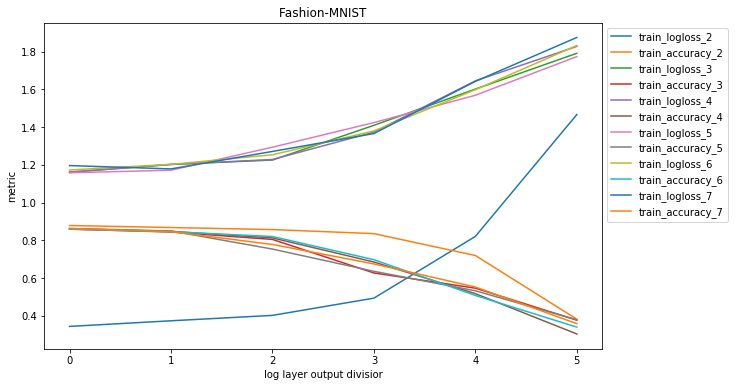

In [14]:
legend = []

plt.figure(figsize=(10, 6))
plt.title('Fashion-MNIST')
plt.plot([result_baseline[i] for i in range(2, 8)])
for i in range(2, 8):
    legend += ['train_logloss_{}'.format(i), 
               'train_accuracy_{}'.format(i)]

for t in [1, 4, 16, 32, 128]:
    plt.plot([result[(t, i)] for i in range(2, 8)])
    for i in range(2, 8):
        legend += ['distill_t_{}_logloss_{}'.format(t, i), 
                   'distill_t_{}_accuracy_{}'.format(t, i)]
    
plt.ylabel('metric')
plt.xlabel('log layer output divisior')
plt.legend(legend, bbox_to_anchor=(1.0, 1.0))